# Jupyter Notebook Project

## 1 - Summary of Selected Project Topic
<br>

The project topic that I have chosen revolve around COVID-19 and GIS application. This topic has affected me in a numerous ways and was inspired by [this post](https://towardsdatascience.com/visualizing-the-coronavirus-pandemic-with-choropleth-maps-7f30fccaecf5). 

The author illustrated and provided examples of how to display COVID-19 using choropleth maps for the entire world using python plotly, numpy, pandas, and other modules. 

This final project is aimed to analyze COVID-19 data for the United States only and provide visualizations. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# load dataset and find latest COVID-19 results
df = pd.read_json("https://covidtracking.com/api/v1/states/daily.json")
df = df.sort_values(by=["date"], ascending=False)
lastDate = df["date"][0]
df_latest = df.loc[df["date"] == lastDate]

df = df.rename(columns={"dateChecked": "date",
                        "totalTestResults": "Total Cases"})

fig = go.Figure(data=go.Choropleth(
    locations=df_latest['state'],
    locationmode='USA-states',
    z=df_latest['positive'],
    colorscale='darkmint',
    marker_line_color='black',
    marker_line_width=0.5,
    ))
fig.update_geos(
    visible=False, resolution=110, scope="usa",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Blue"
)
fig.update_layout(
    title_text='Total Confirmed Cases in USA as of {}'.format(lastDate),
    title_x=0.5,
    geo=dict(projection_type='albers usa'),
    height=500,
    width=700
)

fig.show()

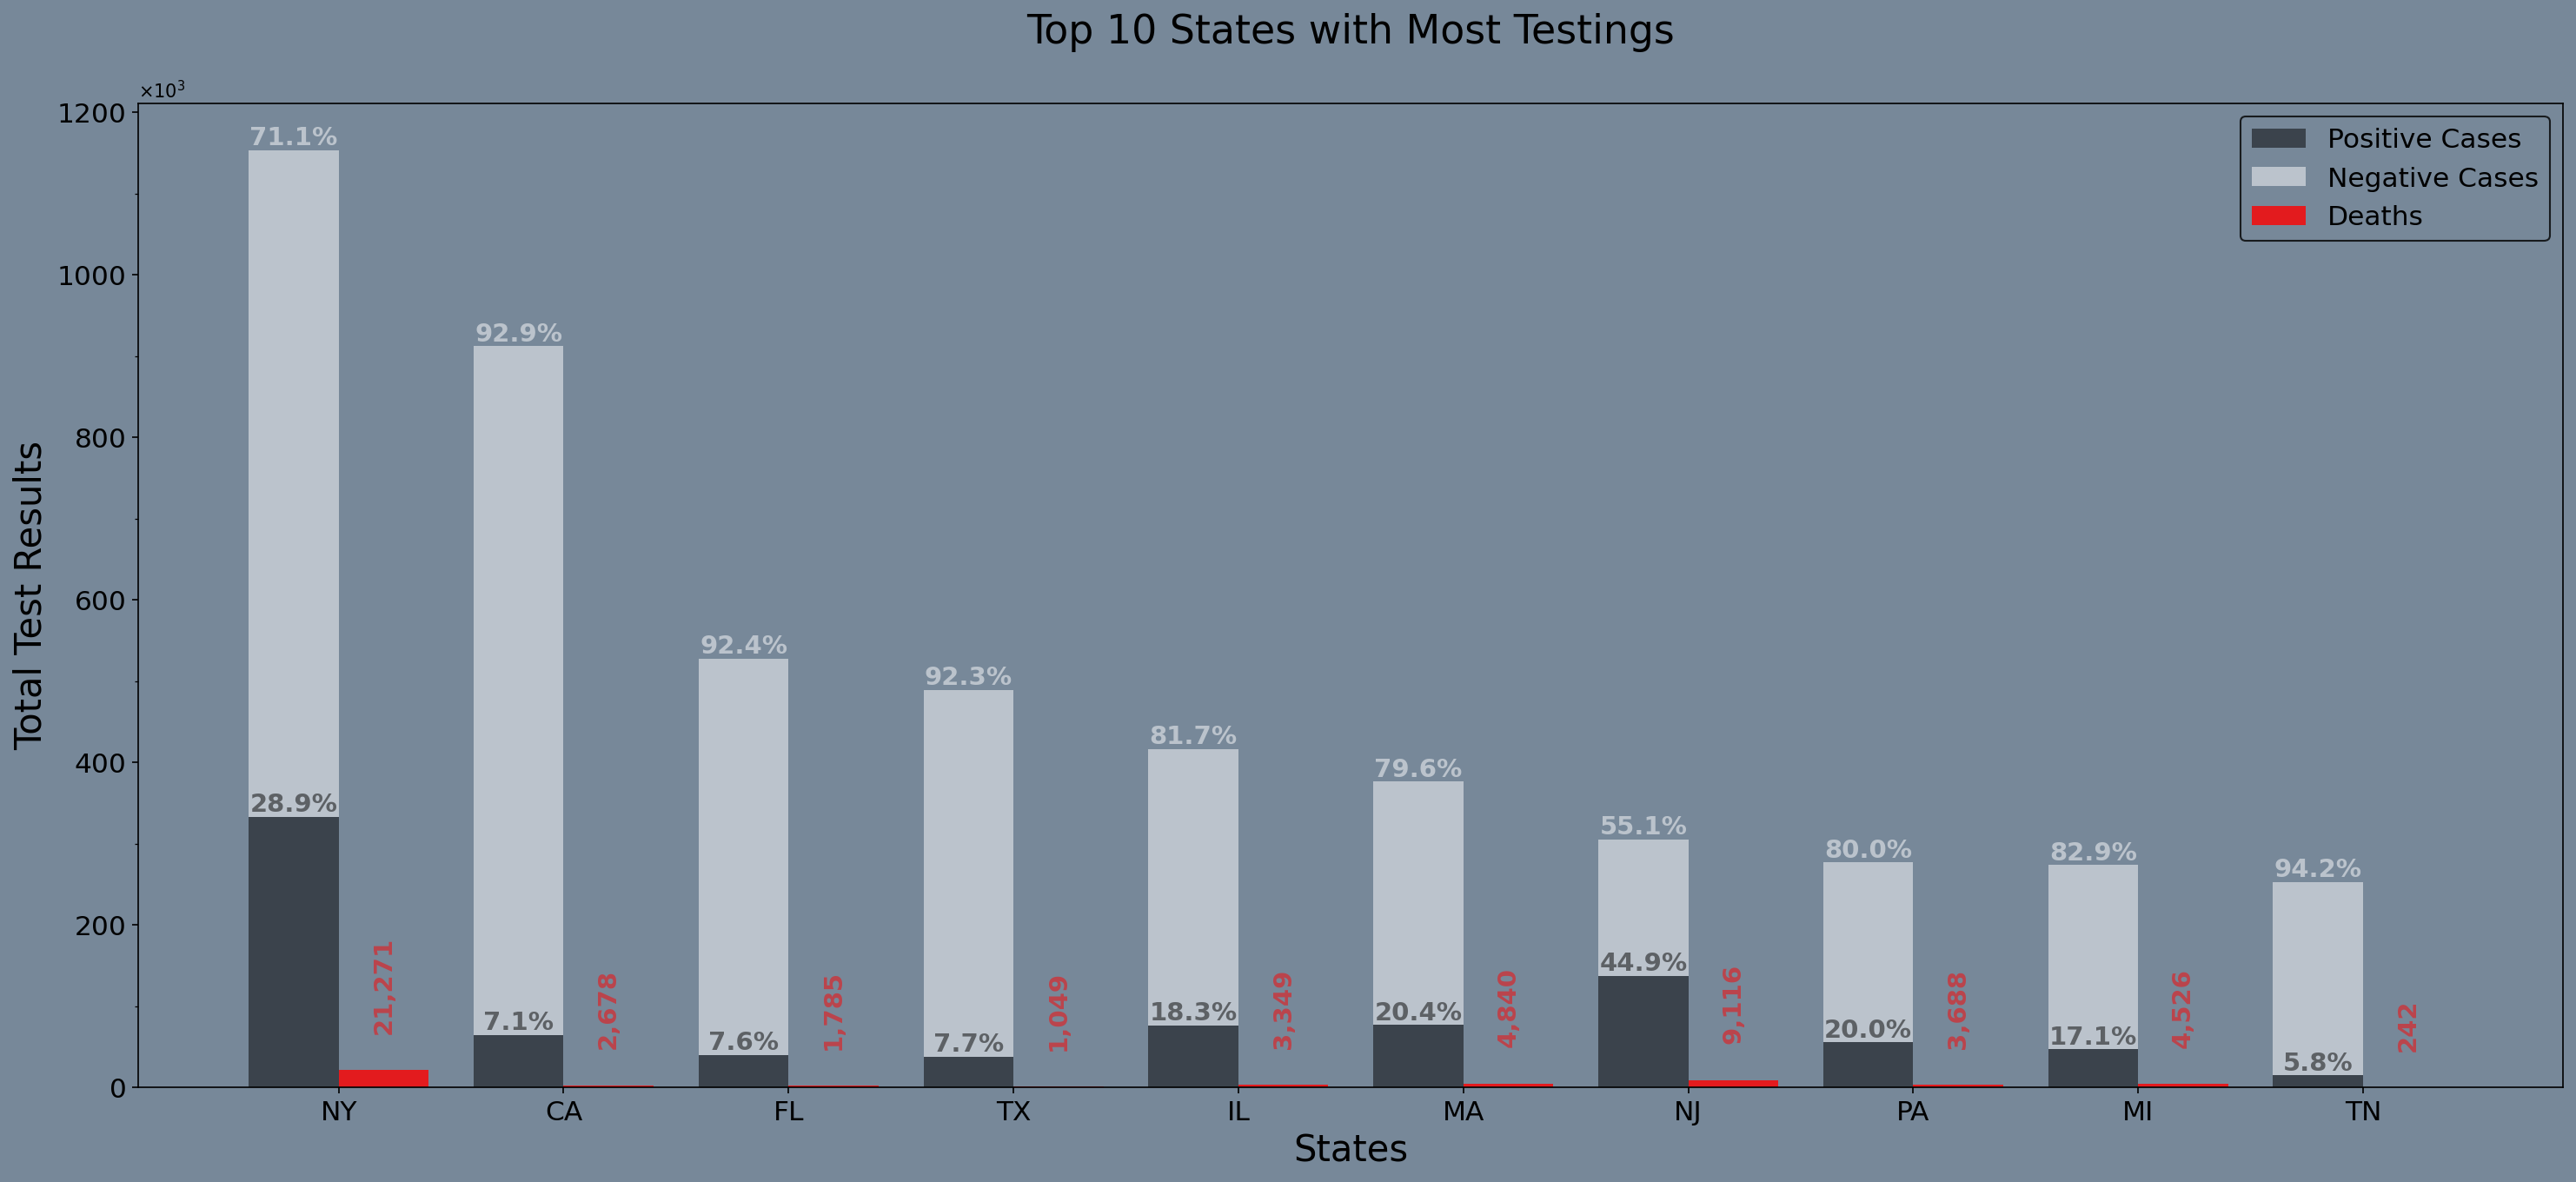

In [7]:
#sort and find top 10 states
df_latest = df_latest.sort_values(by="totalTestResults", ascending=False)[0:10]

#plot variables
x = np.arange(10)
width = 0.4
x_labels = df_latest["state"].tolist()

#initial figure
fig, ax = plt.subplots(figsize=(24, 10), dpi=150,
                       facecolor="lightslategray", edgecolor='k')

# bar graphs for positive, negative, and deaths
pos = ax.bar(x-width/2.,
             df_latest["positive"],
             width,
             color="black",
             alpha=0.5,
             label="Positive Cases"
             )

neg = ax.bar(x-width/2.,
             df_latest["negative"],
             width,
             color="white",
             alpha=0.5,
             bottom=df_latest["positive"],
             label="Negative Cases"
             )
death = ax.bar(x+width/2.,
               df_latest["death"],
               width,
               color="red",
               alpha=0.8,
               label="Deaths"
               )

# adding labels for stacked bar
def addValuesStacked(pos, neg):
    for r1, r2 in zip(pos, neg):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2.,
                 h1,
                 "{:.1%}".format(h1/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="black",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2.,
                 h1 + h2,
                 "{:.1%}".format(h2/(h1+h2)),
                 ha="center",
                 va="bottom",
                 color="white",
                 alpha=0.5,
                 fontsize=14,
                 fontweight="bold")


def addValuesBar(bar):
    for rect in bar:
        h3 = rect.get_height()
        ax.annotate('{:,}'.format(int(h3)),
                    xy=(rect.get_x()+rect.get_width()/2., h3),
                    xytext=(0, 20),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    color='red',
                    rotation=90,
                    alpha=0.5,
                    fontsize=14,
                    fontweight="bold"
                    )


# figure adjustment
ax.set_ylabel('Total Test Results')
ax.set_xlabel('States')
ax.set_title('Top 10 States with Most Testings',
             fontsize=22,
             y=1.05)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
plt.ticklabel_format(style='sci', axis='y', scilimits=(3, 3), useMathText=True)
ax.yaxis.set_minor_locator(MultipleLocator(100000))

# add value labels on bar graphs
addValuesStacked(pos, neg)
addValuesBar(death)

# adjust axes label sizes
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
for item in [ax.xaxis.label, ax.yaxis.label]:
    item.set_fontsize(20)

# colors and yaxis labels
plt.bgcolor = "black"
ax.set_facecolor('lightslategray')
plt.legend(loc="upper right", fontsize=15,
           facecolor="lightslategray", edgecolor="k")


plt.show()